In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps

from scipy.signal import find_peaks
from scipy import signal
from scipy.optimize import curve_fit

import tifffile as tf

Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif
Getting SADs
Getting phases


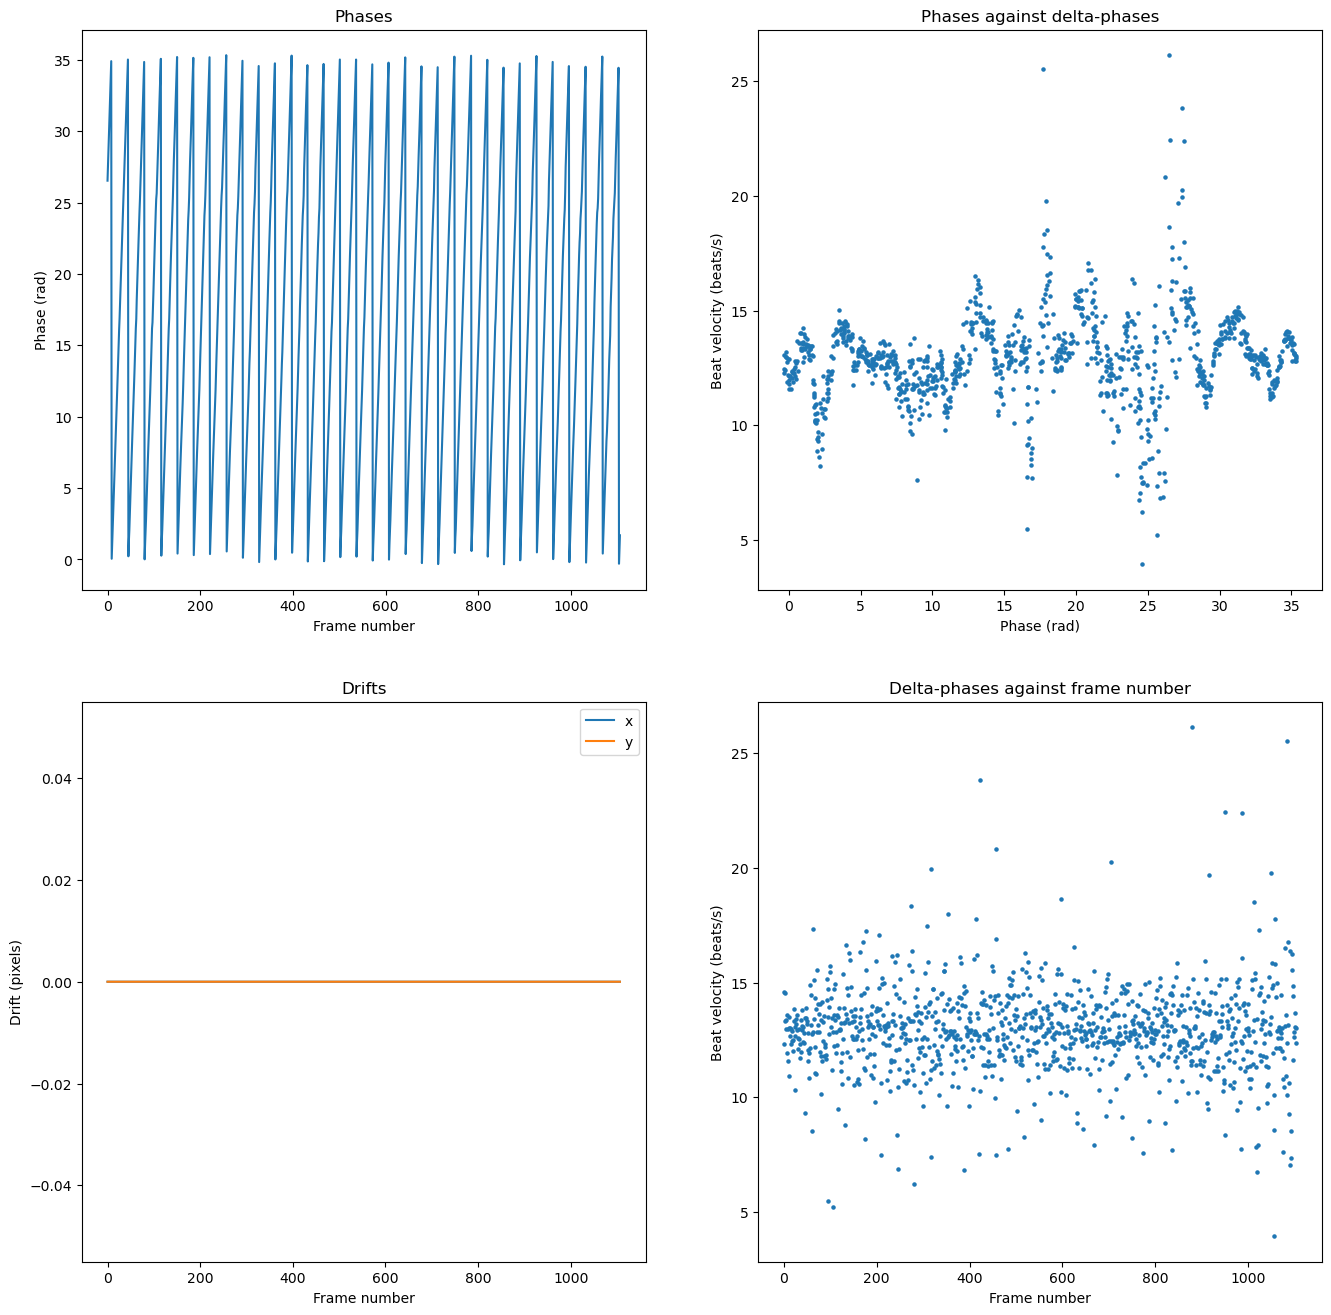

In [2]:
oog = OG.BasicOpticalGating().default()
oog.settings["pi_space"] = False
oog.run()

oog.plot_summary()

In [3]:
data = oog.sequence_manager.load_tif(oog.sequence_manager.sequence_src)

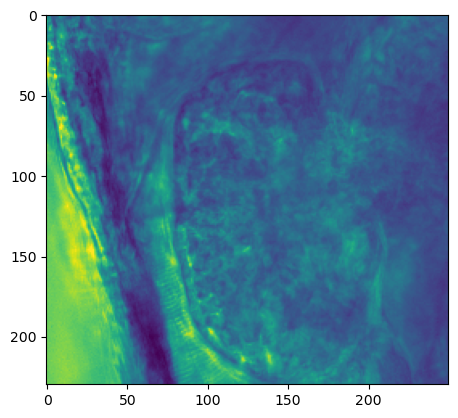

In [4]:
plt.imshow(data[0])

In [5]:
print(data[:][100:150,100:150])

[[[195 194 193 ...  99  96  92]
  [197 195 194 ... 100  95  92]
  [193 194 192 ...  97  93  93]
  ...
  [213 211 212 ... 105 103 104]
  [209 209 212 ... 103 101 100]
  [208 205 206 ... 105 101  99]]

 [[196 192 197 ... 100  96  92]
  [197 196 194 ... 100  95  88]
  [195 197 192 ...  95  93  90]
  ...
  [210 209 213 ... 104 102 101]
  [210 210 212 ... 102 102 101]
  [208 205 212 ... 101 100  99]]

 [[193 194 190 ...  97  95  92]
  [195 191 194 ...  95  92  90]
  [192 197 192 ...  95  88  89]
  ...
  [209 209 213 ... 103 102  99]
  [211 208 214 ... 102 102  98]
  [205 208 207 ... 103  96  98]]

 ...

 [[197 193 196 ... 102  99  95]
  [193 194 194 ... 101  97  96]
  [195 195 192 ...  92  94  97]
  ...
  [209 210 213 ... 101 101  97]
  [210 209 213 ... 101  98  97]
  [209 208 207 ... 100  98  98]]

 [[197 194 195 ...  97  98 101]
  [196 196 195 ...  96 103  99]
  [194 194 193 ... 101 100 102]
  ...
  [210 212 211 ... 100 100  98]
  [210 207 212 ... 101 102 100]
  [210 208 208 ... 100  98 1

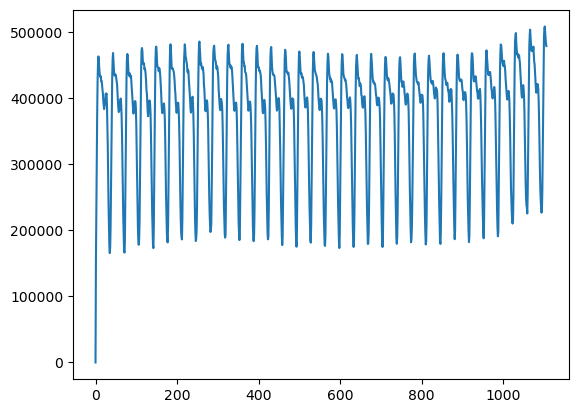

In [6]:
plt.plot(jps.sad_with_references(data[0], data))

In [7]:
print(data[:,100:150,100:150].shape)
print(data.shape)

(1107, 50, 50)
(1107, 230, 250)


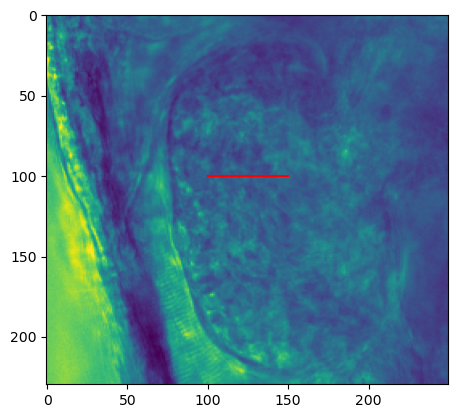

In [11]:
# draw red box on imshow of reference frame 0
box_top_left = (100, 100)
box_width = 50
box_height = 50

plt.imshow(oog.sequence_manager.reference_sequence[0])
plt.plot([box_top_left[1], box_top_left[1] + box_width], [box_top_left[0], box_top_left[0]], 'r')
plt.show()

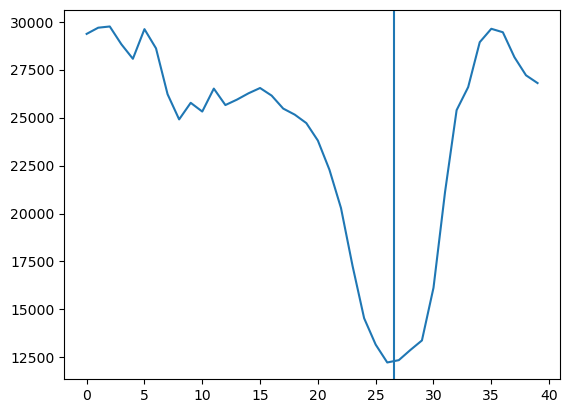

In [21]:
plt.plot(jps.sad_with_references(data[0, box_top_left[0]:box_top_left[0]+box_width, box_top_left[1]:box_top_left[1]+box_height], oog.sequence_manager.reference_sequence[:, box_top_left[0]:box_top_left[0]+box_width, box_top_left[1]:box_top_left[1]+box_height]))
plt.axvline(oog.phases[0])
plt.show()